
@author: Ceccato Rudy \
European Leadership University - Master in Data Science \
Module 02 Assignment 03 

Assignment Steps:

1. Download the following Black Friday (Links to an external site.)Links to an external site. dataset from Kaggle. 

2. Create minimum 5 visualizations from this dataset and share your key observations. Motivate why you chose to perform these types of visualizations. What do they tell you about your data? 

Upload your solution Jupyter notebook on Campus. Please make sure to keep the executed outputs.

Dataset description:

The dataset is a sample of  transactions at a retails store. It contains information about different types of products purchases and some information about the customers. The store wants to better understand the customer purchase behavior with regards to different products.

Although the dataset is designed for a regression problem (where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables), please use it for visualisation in this exercise.

Created on Thu Dec  16 
 

---->PLEASE NOTE:<----
As mentioned, the dataset was designed for regression analisys and lacks lables for some of the items. 
For examples: the 3 categories for City Type are just 'A', 'B' or 'C', the actual typ eis not given.
Product subcategory and professions are just numbers. 
This makes it a bit more difficult when it comes to choosing the right visualization graph as there is a limited view on the relationships between the different data. 

POSSIBLE IMPROVEMENTS:
extract() function could have an option to toggle list conversion from string to int as done in the Scatter Graph section:
#converting string list to int list via comprehension \
occupation_list_int = [int(val) for val in occupation_list_str]

Main - Retrieving and setting up the data

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv
##importing and reading the csv file
with open("./train.csv", mode = 'r') as in_file:
    reader = csv.reader(in_file)
    
    col_headers = []
    
    ##exctracting headers with next() method
    col_headers = next(reader)
   
    ##exctracting each row using comprehension - loop method also included
    rows = [row for row in reader ]
    # for row in reader:
    #     rows.append(row)
    
#converting the headers list into dictionary for reference
headers_ref ={n:col_headers[n-1] for n in range(0, len(col_headers)+1)}
    
#print(rows) ##debug out
print(col_headers)##to test 
##function to get a single category (headers_ref column) as a list
## extract(a_dataset, column index)
def extract(data_set, index):
    column = []
    
    for row in data_set:
        value = row[index]
        column.append(value)
    return column

##generate frequency table as a dictionary
def freq_col(data_set):
    freq_table = {}
    for row in data_set:
        if row in freq_table:
            freq_table[row] +=1
        else:
           freq_table[row] = 1
    return freq_table


['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


GRAPHS

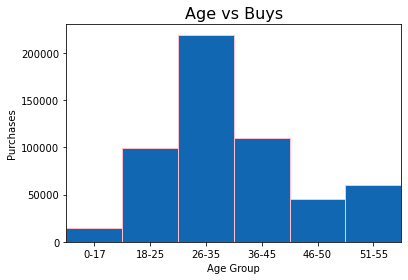

In [7]:
########################################
#### HISTOGRAM - Age Group Vs Purchases
########################################
##preparing data for histogram
histo_list = extract(rows,3)
histo_list.sort()
##~~TRY ALTERNATE COLOR~~
colors = ["#1167B1"]
bins = 6
##set up plot data with matplotlib.subplot
fig, ax = plt.subplots()  # Create a figure containing a single axes.
plt.margins(x=0.0)
## add labels
plt.title("Age vs Buys", fontdict={'fontsize': 16})
plt.xlabel("Age Group")
plt.ylabel("Purchases")

## generate graph data
plt.hist(histo_list, bins, align='left', color=colors, edgecolor='pink')
## display graph
plt.show()


HISTOGRAM - Age Group Vs Purchases

Created an histogram of continuous age data. Although made up of numbers,the age groups can be seen as categorical data.   \ Purchases are quantitative. In addition, they are originally arranged in contiguous class-intervals, which suggests the use of an histogram. The data seems to follow a normal distribution so I decided to learn how to draw a normal curve based on that data, but being already divided in class-intervals I was not sure how to calculate the sd. \
We notice from the graph of the given sample that the age that spend the most during Black Friday is in the 26 to 35 range. 
Naturally, the 0 to 17 range has the least number of buyers, given the lowest disposable income available. \
POSSIBLE IMPROVEMENTS:
alternate colums' color

################################################################################
################################################################################

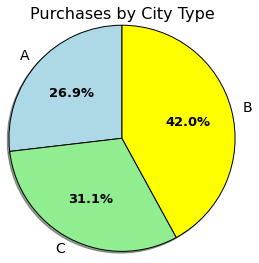

In [5]:
########################################
#### PIE CHART - City Type Vs Purchases
########################################
# ##preparing data for pie chart
pie_dicto = freq_col(extract(rows,5))
##print(pie_dicto) ## debug output
## prepare labels
labels = pie_dicto.keys()
pie_data = pie_dicto.values()
colors = ['lightblue', 'lightgreen', 'yellow']

## add labels
plt.title('Purchases by City Type', fontdict={'fontsize': 16}, pad=11)

## generate graph data
patches, texts, autotexts = plt.pie(pie_data,  labels=labels,  autopct='%1.1f%%', 
        colors=colors, radius = 1.3,
        wedgeprops={"linewidth": 1, "edgecolor": "black"}, 
        textprops={'fontsize': 14}, #label size
        shadow=True, startangle=90)
## Inner label style
plt.setp(autotexts, **{ 'weight':'bold', 'fontsize':13})
## and display graph
plt.show()


PIE CHART - City Type Vs Purchases

To build a Pie Chart I have decided to use the 'City Category' data as it is divided in only 3 categories. 
In addition, the size of the slices gives a visual cue on the size of the population from that piticular type of city.
The graph shows which type of city dwellers from the given sample purchased the most on Black Friday.

################################################################################
################################################################################

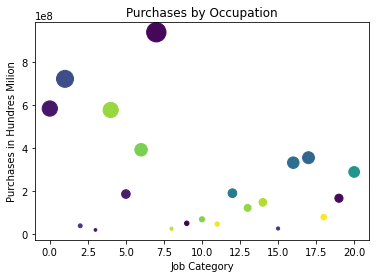

In [8]:
########################################
#### PSCATTER GRAPH - Job category Vs Tot Purchases
########################################
occupation_list_str = extract(rows,4)
#converting string list to int list via comprehension
occupation_list_int = [int(val) for val in occupation_list_str]
#sorting string
occupation_list_int.sort()
#creating frequency hast table/dict for occupation types
occupation_list_int_freq = freq_col(occupation_list_int)
#print(occupation_list_int ) ## debug output
# print(occupation_list_int_freq ) ## debug output
# print(occupation_list_int_freq.keys()) ## debug output
#extract purchases amounts
purchase_list = extract(rows,11)
#print(purchase_list) ## debug output

#### TALLY/GROUPING TOTAL PURCHASES BY PROFESSION
#### THERE MUST BE A BETTER WAY!!!!!!!! --> PANDA to the rescue?????
tot0, tot1, tot2, tot3, tot4, tot5, tot6, tot7, tot8, tot9, tot10 = 0,0,0,0,0,0,0,0,0,0,0
tot11, tot12, tot13, tot14, tot15, tot16, tot17, tot18, tot19, tot20 = 0,0,0,0,0,0,0,0,0,0

for profession in occupation_list_int:
    if profession == 0:
        tot0 += int(purchase_list[profession])
    if profession == 1:
        tot1 += int(purchase_list[profession])
    if profession == 2:
        tot2 += int(purchase_list[profession])
    if profession == 3:
        tot3 += int(purchase_list[profession])
    if profession == 4:
        tot4 += int(purchase_list[profession])
    if profession == 5:
        tot5 += int(purchase_list[profession])
    if profession == 6:
        tot6 += int(purchase_list[profession])
    if profession == 7:
        tot7 += int(purchase_list[profession])
    if profession == 8:
        tot8 += int(purchase_list[profession])
    if profession == 9:
        tot9 += int(purchase_list[profession])
    if profession == 10:
        tot10 += int(purchase_list[profession])
    if profession == 11:
        tot11 += int(purchase_list[profession])
    if profession == 12:
        tot12 += int(purchase_list[profession])
    if profession == 13:
        tot13 += int(purchase_list[profession])
    if profession == 14:
        tot14 += int(purchase_list[profession])
    if profession == 15:
        tot15 += int(purchase_list[profession])
    if profession == 16:
        tot16 += int(purchase_list[profession])
    if profession == 17:
        tot17 += int(purchase_list[profession])
    if profession == 18:
        tot18 += int(purchase_list[profession])
    if profession == 19:
        tot19 += int(purchase_list[profession])
    if profession == 20:
        tot20 += int(purchase_list[profession])
purchase_tot_by_prof = [tot0, tot1, tot2, tot3, tot4, tot5, tot6, tot7, tot8, tot9, tot10,
                        tot11, tot12, tot13, tot14, tot15, tot16, tot17, tot18, tot19, tot20]

#print(purchase_tot_by_prof) # debug output
    
purchase_max = max(purchase_tot_by_prof)
purchase_min = min(purchase_tot_by_prof)
#print(purchase_min, purchase_max) # debug output

##set up data for scatterplot
s = list(map(lambda x: x/2500000, purchase_tot_by_prof))#scale tot puchase list to use as dot size
n = len(occupation_list_int_freq.keys())
colors = np.random.uniform(15, 80, n)

# set up plot
fig, ax = plt.subplots()
## add labels
plt.title("Purchases by Occupation")
plt.xlabel("Job Category")
## Need to fix ticks - NO FLOAT
#plt.xticks( range(22), purchase_tot_by_prof )
plt.ylabel("Purchases in Hundres Milion")

ax.scatter(occupation_list_int_freq.keys(), purchase_tot_by_prof, 
            s=s, c=colors)
# ## and display graph
plt.show()


SCATTER GRAPH - Job category Vs Tot Purchases

For this graph I decided to look into which job category spent the most on Black Friday.
This required to isolate the 21 job category into a list and filter the purchase list by job category and tally the total. I researched on best way to do it but did not find it and had to carry on with the assignment. \
Scatter points size is proportional to total purchase made. \
Category are only given in numerical values, however we can see that: \
    professions 0, 1, 4 and 7 are the one spending most on Black Friday. \
    professions 3, 8 and 15 are the one spending the least on Black Friday.

POSSIBLE IMPROVEMENTS: \
Difficult to tell which data point correspond to which profession/tot expenditure
X and Y ticks lables more precise. Scale graph to better fit data.
I am not sure if the scatter plot has been the best choice here. A bargraph could have been used as well.

################################################################################
################################################################################

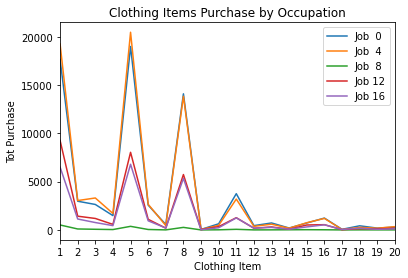

In [5]:
########################################
#### LINES GRAPH- Cloth Category Vs Tot Purchases BY OCCUPATION
########################################
#########OCCUPATION DATA
occupation_list_str = extract(rows,4)
#converting string list to int list via comprehension

occupation_list_int = [int(val) for val in occupation_list_str]
# #print(occupation_list_int) ## debug output

#########CLOTHS DATA
cloths_list_str = extract(rows,8)
#print(cloths_list_str) ##debug out
#converting string list to int list via comprehension
cloths_list_int = [int(val) for val in cloths_list_str]
#print(cloths_list_int) ##debug out
#print(max(cloths_list_int), min(cloths_list_int))

#### AGAIN:
#### TALLY/GROUPING TOTAL CLOTH PURCHASES BY ITEM and PROFESSION
#### THERE MUST BE A BETTER WAY!!!!!!!! --> PANDA to the rescue?????
cloths_list_by_job_0 =[]
cloths_list_by_job_1 =[]
cloths_list_by_job_2 =[]
cloths_list_by_job_3 =[]
cloths_list_by_job_4 =[]
cloths_list_by_job_5 =[]
cloths_list_by_job_6 =[]
cloths_list_by_job_7 =[]
cloths_list_by_job_8 =[]
cloths_list_by_job_9 =[]
cloths_list_by_job_10 =[]
cloths_list_by_job_11 =[]
cloths_list_by_job_12 =[]
cloths_list_by_job_13 =[]
cloths_list_by_job_14 =[]
cloths_list_by_job_15 =[]
cloths_list_by_job_16 =[]
cloths_list_by_job_17 =[]
cloths_list_by_job_18 =[]
cloths_list_by_job_19 =[]
cloths_list_by_job_20 =[]

counter = 0
for cloth in cloths_list_int:
    if occupation_list_int[counter] == 0:
        cloths_list_by_job_0.append(cloth)
    if occupation_list_int[counter] == 1:
        cloths_list_by_job_1.append(cloth)
    if occupation_list_int[counter] == 2:
        cloths_list_by_job_2.append(cloth)
    if occupation_list_int[counter] == 3:
        cloths_list_by_job_3.append(cloth)
    if occupation_list_int[counter] == 4:
        cloths_list_by_job_4.append(cloth)
    if occupation_list_int[counter] == 5:
        cloths_list_by_job_5.append(cloth)
    if occupation_list_int[counter] == 6:
        cloths_list_by_job_6.append(cloth)
    if occupation_list_int[counter] == 7:
        cloths_list_by_job_7.append(cloth)
    if occupation_list_int[counter] == 8:
        cloths_list_by_job_8.append(cloth)
    if occupation_list_int[counter] == 9:
        cloths_list_by_job_9.append(cloth)
    if occupation_list_int[counter] == 10:
        cloths_list_by_job_10.append(cloth)
    if occupation_list_int[counter] == 11:
        cloths_list_by_job_11.append(cloth)
    if occupation_list_int[counter] == 12:
        cloths_list_by_job_12.append(cloth)
    if occupation_list_int[counter] == 13:
        cloths_list_by_job_13.append(cloth)
    if occupation_list_int[counter] == 14:
        cloths_list_by_job_14.append(cloth)
    if occupation_list_int[counter] == 15:
        cloths_list_by_job_15.append(cloth)
    if occupation_list_int[counter] == 16:
        cloths_list_by_job_16.append(cloth)
    if occupation_list_int[counter] == 17:
        cloths_list_by_job_17.append(cloth)
    if occupation_list_int[counter] == 18:
        cloths_list_by_job_18.append(cloth)
    if occupation_list_int[counter] == 19:
        cloths_list_by_job_19.append(cloth)
    if occupation_list_int[counter] == 20:
        cloths_list_by_job_20.append(cloth)
        
    counter += 1

# print(cloths_list_by_job_10)
# print(cloths_list_by_job_19)
# print(len(cloths_list_by_job_10))
# print(len(cloths_list_by_job_19))
#### FREQUENCY TABLE FOR EACH CLOTHING ITEM PURCHASE IN EACH OCCUPATION LIST
cloths_list_by_job_0.sort()
job_0_line = freq_col(cloths_list_by_job_0)
cloths_list_by_job_1.sort()
job_1_line = freq_col(cloths_list_by_job_1)
cloths_list_by_job_2.sort()
job_2_line = freq_col(cloths_list_by_job_2)
cloths_list_by_job_3.sort()
job_3_line = freq_col(cloths_list_by_job_3)
cloths_list_by_job_4.sort()
job_4_line = freq_col(cloths_list_by_job_4)
cloths_list_by_job_5.sort()
job_5_line = freq_col(cloths_list_by_job_5)
cloths_list_by_job_6.sort()
job_6_line = freq_col(cloths_list_by_job_6)
cloths_list_by_job_7.sort()
job_7_line = freq_col(cloths_list_by_job_7)
cloths_list_by_job_8.sort()
job_8_line = freq_col(cloths_list_by_job_8)
cloths_list_by_job_9.sort()
job_9_line = freq_col(cloths_list_by_job_9)
cloths_list_by_job_10.sort()
job_10_line = freq_col(cloths_list_by_job_10)
cloths_list_by_job_11.sort()
job_11_line = freq_col(cloths_list_by_job_11)
cloths_list_by_job_12.sort()
job_12_line = freq_col(cloths_list_by_job_12)
cloths_list_by_job_13.sort()
job_13_line = freq_col(cloths_list_by_job_13)
cloths_list_by_job_14.sort()
job_14_line = freq_col(cloths_list_by_job_14)
cloths_list_by_job_15.sort()
job_15_line = freq_col(cloths_list_by_job_15)
cloths_list_by_job_16.sort()
job_16_line = freq_col(cloths_list_by_job_16)
cloths_list_by_job_17.sort()
job_17_line = freq_col(cloths_list_by_job_17)

#print(job_0_line) ##debug out
#print(job_10_line) ##debug out

########LINE PLOT SET UP & DRAW########
##set up plot data with matplotlib.subplot
fig, ax = plt.subplots()  ## Create a figure containing a single axes.
plt.margins(x=0.0)
## add labels
plt.title("Clothing Items Purchase by Occupation")
plt.xlabel("Clothing Item")
plt.ylabel("Tot Purchase")
## setting ticks for x-axis
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
## generate graph data
plt.plot(job_0_line.keys(), job_0_line.values(), label="Job  0")
plt.plot(job_4_line.keys(), job_4_line.values(), label="Job  4")
plt.plot(job_8_line.keys(), job_8_line.values(), label="Job  8")
plt.plot(job_12_line.keys(), job_12_line.values(), label="Job 12")
plt.plot(job_16_line.keys(), job_16_line.values(), label="Job 16")
## adding legend
leg = ax.legend();
## display graph
plt.show()

LINES GRAPH- Cloth Category Vs Tot Purchases BY OCCUPATION

For this graph I wanted to compare type of clothing sale by occupation. \
I wanted to see if certain cloths were purchase only by individual with specific incomes. \
To do this I had to: 
1) Isolate the 'Cloths' and 'Occupation' values into distinctive lists. \
2) Generate a cloths list for each job category, based on all the clothing purchased by that occupation. \
3) Evaluate the clothing purchase frequency for each list of cloth sale by occupation. \
4) Graph the results, aech job as individual , color-coded lines. \ 
Plese note: not all jobs are graphed. \

The resulting graph is quite interesting. It shows a prominence for sale of certain type of clothing regardless of occupation. \
At first I though it might have been because the data was not actual dale data but randomly generated, and we coould see the 'seed' used. After all, the data in the table is not arranged in a way to immediately notice this. \
However, the graph does makes sense after all as it natual that some clothing types, like underwear or sock; or heavy winter clothing discounted for Black Friday, are purchased more than other across all occupations. \
This graph in a way gives a hint of which type of clothing could be in category 5 or 8.


################################################################################
################################################################################

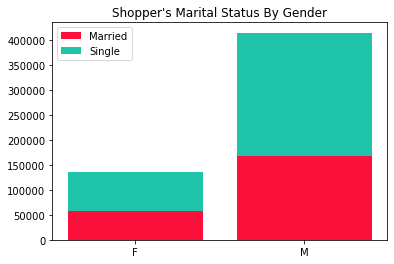

In [2]:
########################################
#### STACKED BAR GRAPH- Shopper's Marital Status By Gender
########################################
#########GENDER  & MARITAL STATUS DATA
##extracting column to list
gender_list = extract(rows,2)
marr_status = extract(rows,7)
# print(gender_list)## debug output
# print(marr_status)## debug output
##freq table for gender and marital status
# gender_freq = freq_col(gender_list)
# marr_status_freq = freq_col(marr_status)
# print(gender_freq)## debug output
# print(marr_status_freq)## debug output


##List for customer marriage by gender
f_married = 0
f_single = 0
m_married = 0
m_single = 0
## frequencies for married/single F and M assuming 0=single, 1=married
counter = 0
for gender in range(0, len(gender_list)):
    if marr_status[counter] == '0' and gender_list[counter] == 'F':
        f_single+=1
    elif  marr_status[counter] == '1' and gender_list[counter] == 'F':
        f_married+=1
    elif marr_status[counter] == '0' and gender_list[counter] == 'M':
        m_single+=1
    elif  marr_status[counter] == '1' and gender_list[counter] == 'M':
        m_married+=1
    counter +=1
        
# print(f_married)
# print(f_single)
# print(m_married)
# print(m_single)

# ##set up plot data with matplotlib.subplot
# ## add labels
plt.title("Shopper's Marital Status By Gender")

# ## generate graph data
x_data_lable = ['F', 'M']
layer00 = [f_married, m_married]
layer01 = [f_single, m_single]
# plot stacked bargraph
plt.bar(x_data_lable, layer00, color='#FC0F3A')
plt.bar(x_data_lable, layer01, bottom=layer00, color='#1FC3AA')
# ## adding legend
plt.legend(["Married", "Single"])
# ## display graph
plt.show()


STACKED BAR GRAPH- Shopper's Marital Status By Gender \
For this grap I decided to compare purchase made by marital status and gender. \
Marital status is only given as 1 or 0. I assumed 1 is married and 9 is single. \
With this premises, I calculated the amount of the purchased made by married females, single females, married men and  single men respectively. \
I then plot them using a stacked bargraph. This method shows that sigle men are spending the most on Black Friday and men overall are the one that spend the most during this period. \

POSSIBLE IMPROVEMENTS: \
Evaluating and displaying percentages of the 4 different categories might help in giving a better idea of the proportions.